<a href="https://colab.research.google.com/github/VolkovDmitr1y/1/blob/main/Autoregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# для работы с данными
import pandas as pd
import numpy as np

# быстрый вызов эконометрических команд
import statsmodels.api as sms
import statsmodels.formula.api as smf

import scipy.stats as stats
import statsmodels.stats.diagnostic as sm_diagnostic
import statsmodels.stats.stattools as sm_tools
import statsmodels.stats.outliers_influence as oi

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# саммари-таблички
!pip install stargazer
from stargazer.stargazer import Stargazer, LineLocation

# исключительно для датасета
!pip install linearmodels

# все для рисования
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

# убрать предупреждения
import warnings
warnings.filterwarnings("ignore")

# визуализация
!pip install seaborn
import seaborn as sb


from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00


In [3]:
Export = pd.read_csv("/content/data_export.csv", sep=";", decimal=",")
Export.head()

,year,EX
0,2000,6.48
1,2000,7.57
2,2000,8.71
3,2000,7.76
4,2000,7.96


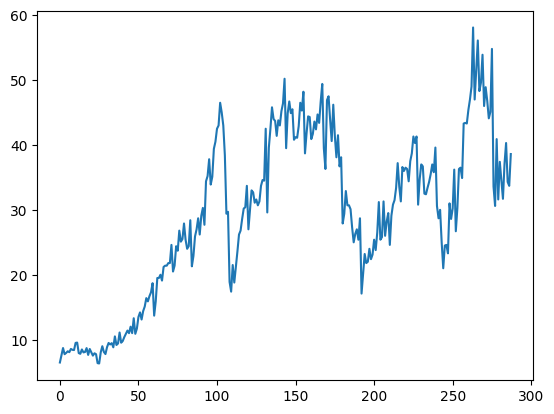

In [4]:
plt.plot(Export['EX'])



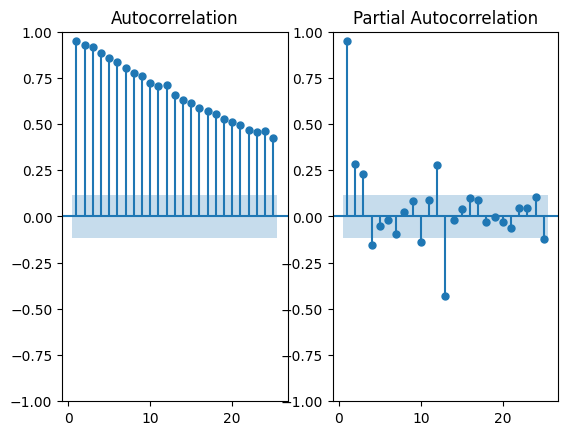

In [5]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp
fig, axes = plt.subplots(1, 2)
smp.plot_acf(Export['EX'], bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(Export['EX'], zero=False, method='ywm',ax=axes[1])
plt.show()

In [6]:

#1. Тест Дики-Фуллера (DF test) - проверяет наличие гетероскедастичности в остатках модели.
from statsmodels. tsa.stattools import adfuller
adfuller(Export['EX'])

(-2.0684273601848657,
 0.2573981120714508,
 16,
 271,
 {'1%': -3.4547128138328875,
  '5%': -2.8722649771800155,
  '10%': -2.5724850011573914},
 1350.1471875551824)

In [7]:
!pip install arch

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 362, in run
    resolver = self.make_resolver(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 177, in make_resolver
    return pip._internal.resolution.resolvelib.resolver.Resolver(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 58, in __init__
    self.factory = Factory(
                   ^^^^^^^^
  File "/usr/local/lib/py

In [13]:
!pip install arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 19.0 MB/s eta 0:00:00


In [15]:
# Импортируем модуль arch и присваиваем его к имени ar
import arch as ar
import arch.unitroot as ar
# Теперь можно использовать ar.ADF
result = ar.ADF(Export['EX'])
print(result.summary())


   Augmented Dickey-Fuller Results   
Test Statistic                 -2.068
P-value                         0.257
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [16]:
#КПСС
ar.KPSS(Export['EX'])


Test Statistic,1.555
P-value,0.000
Lags,10


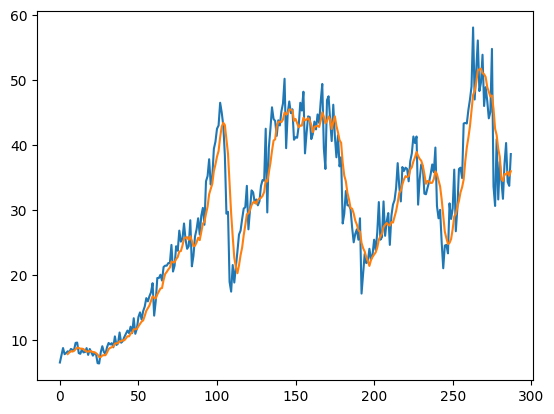

In [18]:
from pandas import DataFrame

# Применяем скользящее среднее с окном 6
Export['season_Export'] = Export['EX'].rolling(window = 6).mean()

# Планируем график
plt.plot(Export['EX'])
plt.plot(Export['season_Export'])
plt.show()

In [19]:
Export_season = Export['season_Export'][6:].diff().dropna()

In [20]:
print(Export['season_Export'][5:])

5       7.781667
6       8.046667
7       8.213333
8       8.166667
9       8.273333
         ...    
283    35.533333
284    35.433333
285    35.883333
286    35.266667
287    35.950000
Name: season_Export, Length: 283, dtype: float64


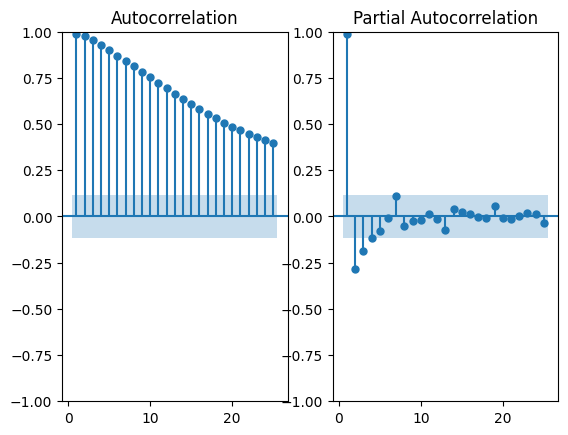

In [22]:
import csv

# Предположим, у нас есть список данных

# Открываем файл для записи
with open('fruits.csv', 'w', newline='') as file:
    # Создаем объект writer
    writer = csv.writer(file)
    # Записываем данные в файл
    writer.writerows(Export)

# Данные успешно сохранены в fruits.csv


import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp
fig, axes = plt.subplots(1, 2)
smp.plot_acf(Export['season_Export'][11:], bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(Export['season_Export'][11:], zero=False, method='ywm',ax=axes[1])
plt.show()

In [23]:
#КПСС
ar.KPSS(Export['season_Export'][5:])

Test Statistic,1.518
P-value,0.000
Lags,10


In [24]:
import arch.unitroot as ar
ar.ADF(Export['season_Export'][5:])

Test Statistic,-2.114
P-value,0.239
Lags,11


In [25]:
ar.PhillipsPerron(Export['season_Export'][5:])


Test Statistic,-1.994
P-value,0.289
Lags,16


In [26]:
season_Export_d = Export['season_Export'][5:].diff().dropna()


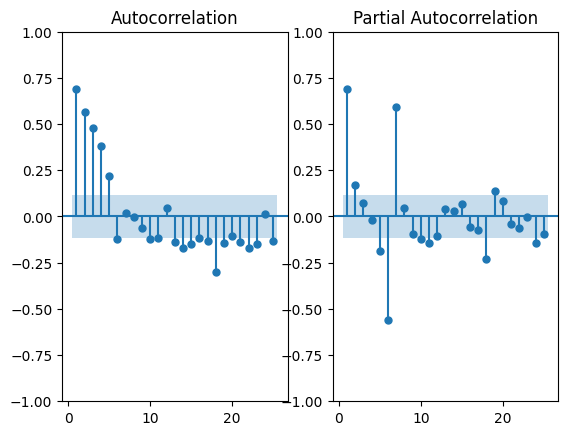

In [27]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp
fig, axes = plt.subplots(1, 2)
smp.plot_acf(season_Export_d, bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(season_Export_d, zero=False, method='ywm',ax=axes[1])
plt.show()

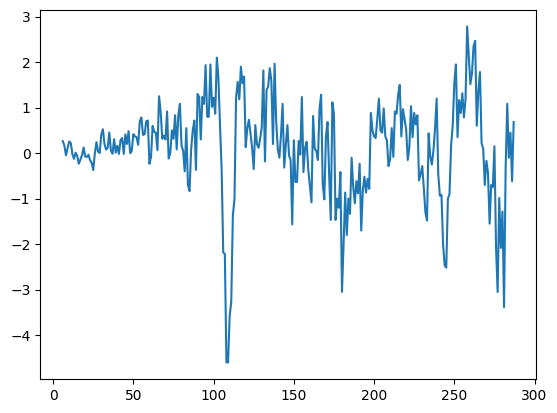

In [28]:
plt.plot(season_Export_d)

In [30]:
#КПСС
ar.KPSS(season_Export_d)

Test Statistic,0.088
P-value,0.649
Lags,9


In [31]:
import arch.unitroot as ar
ar.ADF(season_Export_d)


Test Statistic,-4.936
P-value,0.000
Lags,10


In [32]:
ar.PhillipsPerron(season_Export_d)

Test Statistic,-7.103
P-value,0.000
Lags,16


In [33]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.9 MB/s eta 0:00:00


In [35]:
#тест Дарбина-Ватсона в Python
from statsmodels.stats.stattools import durbin_watson
durbin_watson(Export['season_Export'][5:])
#Если фактическое значение критерия Дарбина-Уотсона равно 0,015, это может указывать на отсутствие автокорреляции,
#поскольку при отсутствии автокорреляции значение DW должно быть близко к 2

0.0011720361080728647

In [36]:
durbin_watson(Export['season_Export'][5:])

0.0011720361080728647

In [38]:
from pmdarima import auto_arima

# Поиск оптимальных параметров модели ARIMA
model = auto_arima(Export['season_Export'][5:], start_p=1, start_q=1, max_p=3, max_q=4, m=6,seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=662.647, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=849.598, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=669.643, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=736.609, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=849.984, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=664.517, Time=0.91 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=664.390, Time=1.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=658.791, Time=1.78 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=554.421, Time=2.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=544.986, Time=0.49 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.75 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=543.341, Time=1.83 se

In [61]:
#выбор параметров без учета сезонности
import statsmodels.tsa.arima.model as sma
model1 = sma.ARIMA(Export['season_Export'][5:], order=(3,1,4))
result1 = model1.fit()
print(result1.summary())

                               SARIMAX Results                                
Dep. Variable:          season_Export   No. Observations:                  283
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -233.821
Date:                Mon, 27 Jan 2025   AIC                            483.642
Time:                        18:15:45   BIC                            512.777
Sample:                             0   HQIC                           495.326
                                - 283                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5747      0.042     13.656      0.000       0.492       0.657
ar.L2         -0.5336      0.047    -11.382      0.000      -0.626      -0.442
ar.L3          0.4393      0.044     10.019      0.0

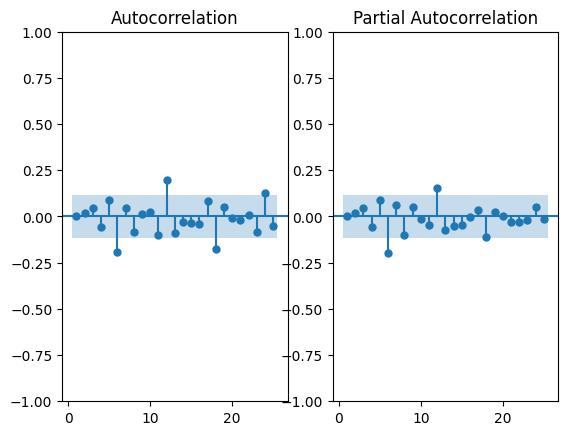

In [62]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp
fig, axes = plt.subplots(1, 2)
smp.plot_acf(result1.resid, bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(result1.resid, zero=False, method='ywm',ax=axes[1])
plt.show()

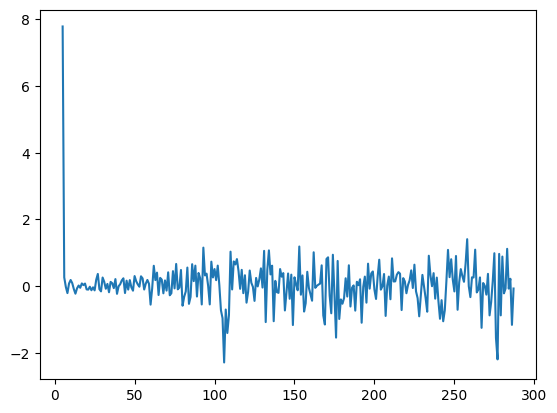

In [63]:
plt.plot(result1.resid)

plt.show()

In [64]:
#выбор параметров с учетом сезонности
import statsmodels.tsa.arima.model as sma
model2 = sma.ARIMA(Export['season_Export'][5:], order=(2,1,3))
result2 = model2.fit()
print(result2.summary())

                               SARIMAX Results                                
Dep. Variable:          season_Export   No. Observations:                  283
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -269.268
Date:                Mon, 27 Jan 2025   AIC                            550.537
Time:                        18:15:47   BIC                            572.388
Sample:                             0   HQIC                           559.299
                                - 283                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4532      0.049      9.304      0.000       0.358       0.549
ar.L2          0.1380      0.051      2.725      0.006       0.039       0.237
ma.L1          0.0073      0.055      0.134      0.8

In [65]:
#Анализ остатков модели
import statsmodels.stats.api as sms
sms.jarque_bera(result1.resid)

(27355.660500755635, 0.0, 4.130733370104603, 50.45168952463749)

In [66]:
sms.acorr_ljungbox(result1.resid, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.007809,0.929585,0.007727,0.929956
2,0.106472,0.948156,0.105005,0.948852
3,0.704359,0.872178,0.692403,0.874989
4,1.574753,0.813323,1.544472,0.818736
5,3.791424,0.579819,3.706699,0.592367
6,14.401058,0.025463,14.018519,0.029430
7,15.076239,0.035034,14.672378,0.040436
8,17.075379,0.029334,16.601373,0.034538
9,17.135915,0.046630,16.659573,0.054322
10,17.330732,0.067359,16.846187,0.077838


In [67]:
#ARCH тест
sms.het_arch(result1.resid, ddof=2)

(26.728444601915804,
 0.0028746487496520844,
 2.8668309227775373,
 0.0020792493471012093)

In [68]:
# Прогнозирование (ddof= p+q (в с улчае без ARIMA))
sms.het_arch(result1.resid, ddof=8)

(26.136670920692577,
 0.0035606548488834396,
 2.8668309227775373,
 0.0020792493471012093)

In [69]:
dataset = pd.DataFrame({'Y': result1.resid})
sms.acorr_breusch_godfrey(smf.ols('Y ~ 1', data=dataset).fit(), nlags=1)

(-106.28927100542626, 1.0, 0.005323831224824029, 0.9418863904919036)

In [70]:
dataset = pd.DataFrame({'Y': result1.resid})
sms.acorr_breusch_godfrey(smf.ols('Y ~ 1', data=dataset).fit(), nlags=6)

(14.67436959143013,
 0.02294634591736964,
 2.5156784321272503,
 0.021857629104092422)

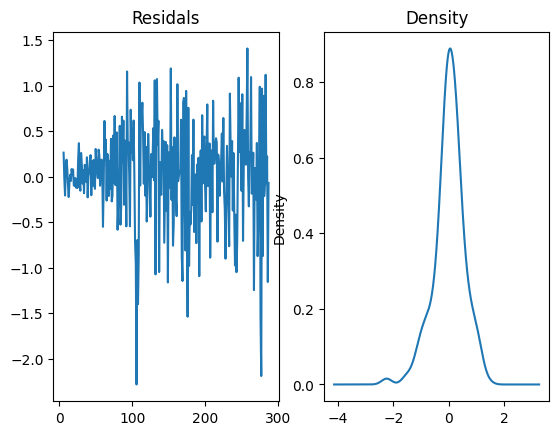

In [71]:
import matplotlib.pyplot as plt
residuals = result1.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

In [55]:
!pip install pmdarima


In [73]:
from pmdarima import auto_arima

In [75]:
# Прогнозирование
Y_forecast = result1.get_forecast(steps=10)
print(Y_forecast.predicted_mean)

288    35.569168
289    34.941840
290    34.016389
291    33.589075
292    33.561740
293    33.367492
294    33.082705
295    33.010677
296    33.035916
297    32.963746
Name: predicted_mean, dtype: float64


In [76]:
#СВОЙСТВА ПРОГНОЗОВ. Средняя абсолютная процентная ошибка прогнозирование MAPE ( 395 )
model11 = sma.ARIMA(Export['season_Export'][241:283], order=(3,1,4), enforce_stationarity=False)
with model11.fix_params({'ar.L1': 0}):
# fit тренирует модель
  result11 = model11.fit()
  print(result11.summary())

                               SARIMAX Results                                
Dep. Variable:          season_Export   No. Observations:                   42
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 -45.558
Date:                Mon, 27 Jan 2025   AIC                            105.116
Time:                        18:18:16   BIC                            116.201
Sample:                             0   HQIC                           108.985
                                 - 42                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1 (fixed)          0        nan        nan        nan         nan         nan
ar.L2             0.2802      0.290      0.965      0.335      -0.289       0.849
ar.L3             0.1848      0.330     

In [77]:
result_full = result11.apply(Export['season_Export'][241:277])
result_forecast = result11.get_forecast(steps=36)
E = Export['EX'][312:156] - result_forecast.predicted_mean

In [78]:
result_forecast.predicted_mean[:42]

,predicted_mean
283,32.962330
284,32.561806
285,31.322227
286,31.100241
287,30.678921
288,30.387605
289,30.228534
290,30.069041
291,29.970628
292,29.896541


In [79]:
result_full.resid[:42]

,0
241,34.533333
242,-0.916667
243,-6.837517
244,-5.231055
245,-1.786896
246,0.060758
247,0.243955
248,0.843880
249,0.759393
250,1.165352


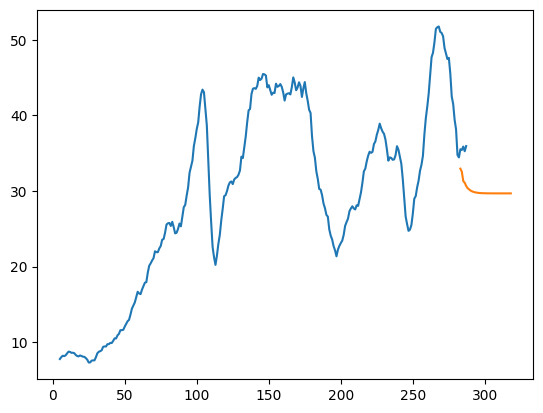

In [85]:
plt.plot(Export['season_Export'][:])
plt.plot(result_forecast.predicted_mean[:42])


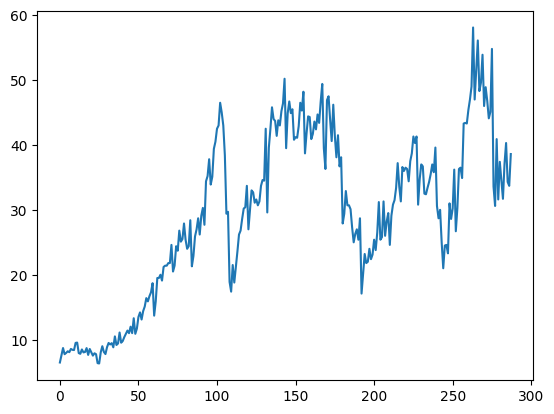

In [86]:
from pandas import DataFrame

# Планируем график
plt.plot(Export['EX'])
plt.plot(result_full.resid[348:])
plt.show()